In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#dataset = pd.read_excel('Work Dataset.xlsx')

In [8]:
#load dataste
dataset = pd.read_excel("Work Dataset.xlsx")  
print(dataset['Start Time'].head(10).to_list())

[datetime.time(10, 36), datetime.time(10, 42), datetime.time(10, 30), datetime.time(11, 24), datetime.time(10, 40), datetime.time(10, 40), datetime.time(11, 40), datetime.time(11, 33), datetime.time(10, 35), datetime.time(10, 33)]


In [10]:
dataset = pd.read_excel("Work Dataset.xlsx")

# Confirm again  
print(type(dataset['Start Time'][0]))  


<class 'datetime.time'>


In [12]:
from datetime import datetime, timedelta

# Combine 'Date' and 'Start Time' and force PM (add 12 hours)
dataset['Start DateTime'] = dataset.apply(
    lambda row: datetime.combine(row['Date'], row['Start Time']) + timedelta(hours=12),
    axis=1
)

In [26]:
dataset.head(3)

,Date,Day,Start Time,Feeling,Music,Genre,Break Duration,Building Condition,Type of Cleaning,Completion Time,Comment,Start DateTime,End DateTime,Duration
0,2024-11-10,Sunday Night,10:36:00,Neutral,Yes,Blues,45,Semi-clean,Minimal,04:21:00,Overtime worked,2024-11-10 22:36:00,2024-11-11 04:21:00,0 days 05:45:00
1,2024-11-11,Monday night,10:42:00,Tired,Yes,Mixed,45,Dirty,Detailed,05:07:00,NaN,2024-11-11 22:42:00,2024-11-12 05:07:00,0 days 06:25:00
2,2024-11-12,Tues night,10:30:00,Tired,No,NaN,30,Dirty,Detailed,05:24:00,NaN,2024-11-12 22:30:00,2024-11-13 05:24:00,0 days 06:54:00


In [28]:
dataset['End DateTime'] = dataset.apply(
    lambda row: datetime.combine(row['Date'], row['Completion Time']) +
                timedelta(days=1 if row['Completion Time'] < row['Start Time'] else 0),
    axis=1
)
dataset.head(3)

,Date,Day,Start Time,Feeling,Music,Genre,Break Duration,Building Condition,Type of Cleaning,Completion Time,Comment,Start DateTime,End DateTime,Duration
0,2024-11-10,Sunday Night,10:36:00,Neutral,Yes,Blues,45,Semi-clean,Minimal,04:21:00,Overtime worked,2024-11-10 22:36:00,2024-11-11 04:21:00,0 days 05:45:00
1,2024-11-11,Monday night,10:42:00,Tired,Yes,Mixed,45,Dirty,Detailed,05:07:00,NaN,2024-11-11 22:42:00,2024-11-12 05:07:00,0 days 06:25:00
2,2024-11-12,Tues night,10:30:00,Tired,No,NaN,30,Dirty,Detailed,05:24:00,NaN,2024-11-12 22:30:00,2024-11-13 05:24:00,0 days 06:54:00


In [30]:
#calculate duration
dataset['Duration'] = dataset['End DateTime'] - dataset['Start DateTime']

In [32]:
#preview duration, start and  completion time 
dataset[['Start DateTime', 'End DateTime', 'Duration']].head()

,Start DateTime,End DateTime,Duration
0,2024-11-10 22:36:00,2024-11-11 04:21:00,0 days 05:45:00
1,2024-11-11 22:42:00,2024-11-12 05:07:00,0 days 06:25:00
2,2024-11-12 22:30:00,2024-11-13 05:24:00,0 days 06:54:00
3,2024-11-13 23:24:00,2024-11-14 05:30:00,0 days 06:06:00
4,2024-11-14 22:40:00,2024-11-15 05:26:00,0 days 06:46:00


In [34]:
dataset[['Start DateTime', 'End DateTime', 'Duration']].head()


,Start DateTime,End DateTime,Duration
0,2024-11-10 22:36:00,2024-11-11 04:21:00,0 days 05:45:00
1,2024-11-11 22:42:00,2024-11-12 05:07:00,0 days 06:25:00
2,2024-11-12 22:30:00,2024-11-13 05:24:00,0 days 06:54:00
3,2024-11-13 23:24:00,2024-11-14 05:30:00,0 days 06:06:00
4,2024-11-14 22:40:00,2024-11-15 05:26:00,0 days 06:46:00


In [36]:
#convert duration to hrs and minutes format
def format_duration(td):
    total_minutes = int(td.total_seconds() // 60)
    hours = total_minutes // 60
    minutes = total_minutes % 60
    return f"{hours} hrs {minutes} min"

# Apply it to the Duration column
dataset['Formatted Duration'] = dataset['Duration'].apply(format_duration)


In [38]:
dataset.head(3)

,Date,Day,Start Time,Feeling,Music,Genre,Break Duration,Building Condition,Type of Cleaning,Completion Time,Comment,Start DateTime,End DateTime,Duration,Formatted Duration
0,2024-11-10,Sunday Night,10:36:00,Neutral,Yes,Blues,45,Semi-clean,Minimal,04:21:00,Overtime worked,2024-11-10 22:36:00,2024-11-11 04:21:00,0 days 05:45:00,5 hrs 45 min
1,2024-11-11,Monday night,10:42:00,Tired,Yes,Mixed,45,Dirty,Detailed,05:07:00,NaN,2024-11-11 22:42:00,2024-11-12 05:07:00,0 days 06:25:00,6 hrs 25 min
2,2024-11-12,Tues night,10:30:00,Tired,No,NaN,30,Dirty,Detailed,05:24:00,NaN,2024-11-12 22:30:00,2024-11-13 05:24:00,0 days 06:54:00,6 hrs 54 min


In [40]:
#convert Day to take the actual day name of date
dataset['Day'] = dataset['Date'].dt.day_name()
dataset.head()

,Date,Day,Start Time,Feeling,Music,Genre,Break Duration,Building Condition,Type of Cleaning,Completion Time,Comment,Start DateTime,End DateTime,Duration,Formatted Duration
0,2024-11-10,Sunday,10:36:00,Neutral,Yes,Blues,45,Semi-clean,Minimal,04:21:00,Overtime worked,2024-11-10 22:36:00,2024-11-11 04:21:00,0 days 05:45:00,5 hrs 45 min
1,2024-11-11,Monday,10:42:00,Tired,Yes,Mixed,45,Dirty,Detailed,05:07:00,NaN,2024-11-11 22:42:00,2024-11-12 05:07:00,0 days 06:25:00,6 hrs 25 min
2,2024-11-12,Tuesday,10:30:00,Tired,No,NaN,30,Dirty,Detailed,05:24:00,NaN,2024-11-12 22:30:00,2024-11-13 05:24:00,0 days 06:54:00,6 hrs 54 min
3,2024-11-13,Wednesday,11:24:00,Tired,Yes,Mixed,45,Dirty,Detail,05:30:00,NaN,2024-11-13 23:24:00,2024-11-14 05:30:00,0 days 06:06:00,6 hrs 6 min
4,2024-11-14,Thursday,10:40:00,Tired,No,NaN,50,Mild,Detail,05:26:00,NaN,2024-11-14 22:40:00,2024-11-15 05:26:00,0 days 06:46:00,6 hrs 46 min


In [42]:
#to visualize average completion time, first create a column to convert duration to minutes

dataset['Duration_Mins'] = dataset['Duration'].dt.total_seconds()/60

In [44]:
dataset.head(1)

,Date,Day,Start Time,Feeling,Music,Genre,Break Duration,Building Condition,Type of Cleaning,Completion Time,Comment,Start DateTime,End DateTime,Duration,Formatted Duration,Duration_Mins
0,2024-11-10,Sunday,10:36:00,Neutral,Yes,Blues,45,Semi-clean,Minimal,04:21:00,Overtime worked,2024-11-10 22:36:00,2024-11-11 04:21:00,0 days 05:45:00,5 hrs 45 min,345.0


In [183]:
dataset.head()

,Date,Day,Start Time,Feeling,Music,Genre,Break Duration,Building Condition,Type of Cleaning,Completion Time,Comment,Start DateTime,End DateTime,Duration,Formatted Duration,Duration_Mins
0,2024-11-10,Sunday,10:36:00,Neutral,Yes,Blues,45,Semi-clean,Minimal,04:21:00,Overtime worked,2024-11-10 22:36:00,2024-11-11 04:21:00,0 days 05:45:00,5 hrs 45 min,345.0
1,2024-11-11,Monday,10:42:00,Tired,Yes,Mixed,45,Dirty,Detailed,05:07:00,NaN,2024-11-11 22:42:00,2024-11-12 05:07:00,0 days 06:25:00,6 hrs 25 min,385.0
2,2024-11-12,Tuesday,10:30:00,Tired,No,NaN,30,Dirty,Detailed,05:24:00,NaN,2024-11-12 22:30:00,2024-11-13 05:24:00,0 days 06:54:00,6 hrs 54 min,414.0
3,2024-11-13,Wednesday,11:24:00,Tired,Yes,Mixed,45,Dirty,Detail,05:30:00,NaN,2024-11-13 23:24:00,2024-11-14 05:30:00,0 days 06:06:00,6 hrs 6 min,366.0
4,2024-11-14,Thursday,10:40:00,Tired,No,NaN,50,Mild,Detail,05:26:00,NaN,2024-11-14 22:40:00,2024-11-15 05:26:00,0 days 06:46:00,6 hrs 46 min,406.0


In [46]:
#display average value when music was played
avg_with_music = dataset[dataset['Music'] == "Yes"]['Duration_Mins'].mean()
print(avg_with_music)

349.90909090909093


In [48]:
#display average value when music was not played
avg_without_music = dataset[dataset['Music'] == "No"]['Duration_Mins'].mean()
print(avg_without_music)

368.0


In [50]:
#cacluate the difference between the two averages 
time_difference = avg_with_music - avg_without_music
print(time_difference)

-18.090909090909065


In [52]:
#display average difference for with music and wwithout music categories 
labels = ["With Music", "Without Music"]
values = [avg_with_music, avg_without_music]
print(labels, values)

['With Music', 'Without Music'] [349.90909090909093, 368.0]


In [54]:
#display average result in a table for better visual
import pandas as pd
avg_result = pd.DataFrame({
    'Category' : labels,
    'Values' : values})
print(avg_result)

        Category      Values
0     With Music  349.909091
1  Without Music  368.000000


C:\Users\Maureen Michael\AppData\Local\Temp\ipykernel_19512\1986539435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Category', y = 'Values', data = avg_result, palette =


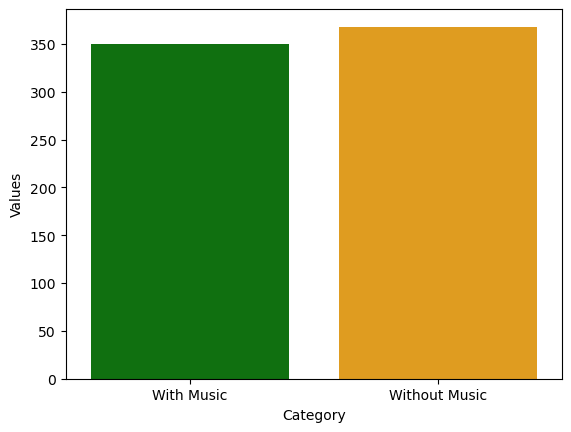

In [195]:
#plot a barchart to show avg_result
sns.barplot(x = 'Category', y = 'Values', data = avg_result, palette =
           {'With Music': 'Green', 'Without Music':'Orange'})
plt.show()

In [56]:
# display earliest  and latest completion date

earliest_completion = dataset['End DateTime'].min()
latest_completion = dataset['End DateTime'].max()

date = ['Earliest Completion', 'Latest Completion']
result = [earliest_completion, latest_completion]

#put result in a  dataframe

completion_diff = pd.DataFrame({
    'Date': date,
    'Result': result})
completion_diff.head()

,Date,Result
0,Earliest Completion,2024-11-11 04:21:00
1,Latest Completion,2025-01-14 05:00:00


In [58]:
#using completion column to get earliest and latest time of work work completion
#get earliest and it row
earliest_comp = dataset['Completion Time'].min()
earliest_date = dataset.loc[dataset['Completion Time'] == earliest_comp, 'Date'].iloc[0]

#get latest and row
latest_comp = dataset['Completion Time'].max()
latest_date = dataset.loc[dataset['Completion Time'] == latest_comp, 'Date'].iloc[0]

#create list for the times
completion_type = ['Earliest Completion', 'Latest Completion']
time = [earliest_comp, latest_comp]
date = [earliest_date, latest_date]

#create a dataframe to hold the result
completion_time = pd.DataFrame({
    'Type': completion_type,
    'Time': time,
    'Date': date})
completion_time.head()

,Type,Time,Date
0,Earliest Completion,03:40:00,2024-12-16
1,Latest Completion,05:30:00,2024-11-13


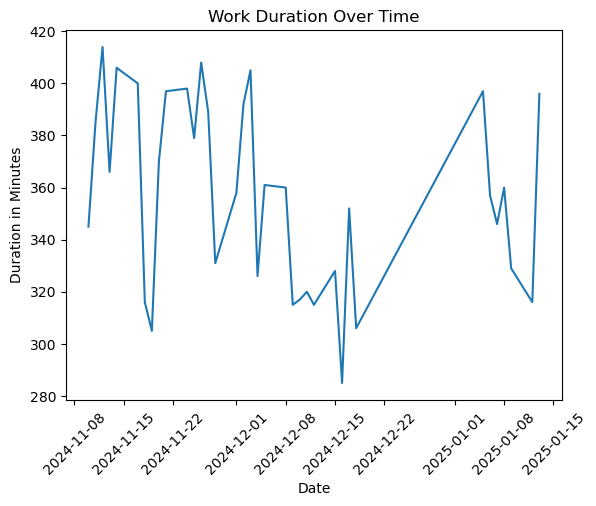

In [201]:
#plot a line graph for Date and Duration_Mins to understand work completion time trend overtime 
dataset = dataset.sort_values('Date')
sns.lineplot(x = 'Date', y = 'Duration_Mins', data = dataset)
plt.xticks(rotation =  45)
plt.title('Work Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Duration in Minutes')
plt.show()

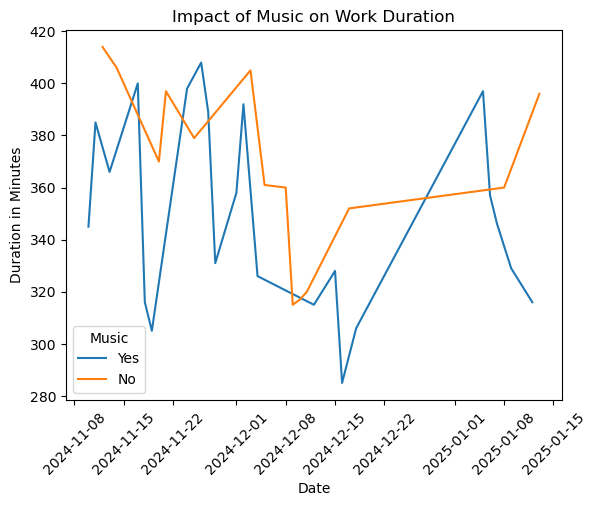

In [60]:
#explore music impact on work completion
# first sort by date
dataset = dataset.sort_values('Date')
#plot line graph
sns.lineplot(x = 'Date', y = 'Duration_Mins', hue = 'Music', data = dataset)
plt.xticks(rotation = 45)
plt.title('Impact of Music on Work Duration')
plt.xlabel('Date')
plt.ylabel('Duration in Minutes')

plt.show()

In [62]:
# find out the day of the week with the highest count of earliest completion time
earliest_times =  dataset[dataset['Completion Time'] < pd.to_datetime('05:00:00').time()]
#select few columns to display the output of earliest times and features 
print(earliest_times[['Day', 'Start Time', 'Feeling', 'Music', 'Completion Time']])

          Day Start Time          Feeling Music Completion Time
0      Sunday   10:36:00          Neutral   Yes        04:21:00
6      Monday   11:40:00          Neutral   Yes        04:56:00
7     Tuesday   11:33:00          Neutral   Yes        04:38:00
8   Wednesday   10:35:00          Neutral    No        04:45:00
14   Thursday   10:49:00            Tired   Yes        04:20:00
18  Wednesday   10:29:00          Neutral   Yes        03:55:00
19   Thursday   10:29:00            Tired    No        04:30:00
20     Sunday   10:45:00            Tired    No        04:45:00
22    Tuesday   10:33:00  Extremely Tired    No        03:50:00
23  Wednesday   10:25:00          Neutral    No        03:45:00
24   Thursday   10:30:00          Neutral   Yes        03:45:00
25     Sunday   10:42:00          Neutral   Yes        04:10:00
26     Monday   10:55:00          Neutral   Yes        03:40:00
27    Tuesday   10:38:00          Neutral    No        04:30:00
28  Wednesday   10:34:00          Neutra

In [64]:
#show days of earliest and latest times and their counts in a dataframe
#earliest days
early_days_count = earliest_times['Day'].value_counts()
print(early_days_count)

Day
Wednesday    5
Sunday       4
Tuesday      4
Thursday     4
Monday       3
Name: count, dtype: int64


In [66]:
#show latest times
latest_times =  dataset[dataset['Completion Time']  > pd.to_datetime('05:00:00').time()]

#display latest time and some impactful features
print(latest_times[['Day', 'Start Time', 'Feeling', 'Music', 'Completion Time']])

          Day Start Time    Feeling Music Completion Time
1      Monday   10:42:00      Tired   Yes        05:07:00
2     Tuesday   10:30:00      Tired    No        05:24:00
3   Wednesday   11:24:00      Tired   Yes        05:30:00
4    Thursday   10:40:00      Tired    No        05:26:00
5      Sunday   10:40:00      Tired   Yes        05:20:00
9    Thursday   10:33:00      Tired    No        05:10:00
10     Sunday   10:37:00  Energetic   Yes        05:15:00
11     Monday   10:51:00      Tired    No        05:10:00
12    Tuesday   10:22:00      Tired   Yes        05:10:00
15     Sunday   11:12:00    Neutral   Yes        05:10:00
16     Monday   10:38:00    Neutral   Yes        05:10:00
17    Tuesday   10:35:00      Tired    No        05:20:00
29     Sunday   10:43:00    Neutral   Yes        05:20:00


In [68]:
#latest days
late_days_count = latest_times['Day'].value_counts()
print(late_days_count)

Day
Sunday       4
Monday       3
Tuesday      3
Thursday     2
Wednesday    1
Name: count, dtype: int64


In [70]:
from datetime import time

def mins_to_time(minutes):
    h = int(minutes // 60)
    m = int(minutes % 60)
    return time(h, m).strftime("%I:%M %p")


In [72]:
#what makes wednesday earliest and Sunday latest
wednesdays = dataset[dataset['Day'] == 'Wednesday']
sundays = dataset[dataset['Day'] == 'Sunday']

#explore feelings impact
weds_feeling = wednesdays['Feeling'].value_counts().idxmax()
sun_feeling = sundays['Feeling'].value_counts().idxmax()

#average break duration for each day
weds_avg_break = wednesdays['Break Duration'].mean()
sun_avg_break = sundays['Break Duration'].mean()
#days list
days  = ['Wednesday', 'Sunday']
#list of  feeling result
feelings = [weds_feeling, sun_feeling]

#list of break duration average
avg_brk = [weds_avg_break, sun_avg_break]


#I figured that both days have the same dominant feeling which is neutral, and more breaks are taken on Wedsnesday, let's explore more factors
#explore  building condition
weds_building_con = wednesdays['Building Condition'].value_counts().idxmax()
sun_building_con = sundays['Building Condition'].value_counts().idxmax()

#building condition list
building_con = [weds_building_con, sun_building_con]

#exploring type of cleaning 
weds_cleaning = wednesdays['Type of Cleaning'].value_counts().idxmax()
sun_cleaning = sundays['Type of Cleaning'].value_counts().idxmax()
#list of cleaning type
cleaning_type = [weds_cleaning, sun_cleaning]
#explore music


#explore  start time
weds_avg_start = wednesdays['Start Time'].apply(lambda t: (t.hour + 12) * 60 + t.minute).mean()
sun_avg_start = sundays['Start Time'].apply(lambda t: (t.hour + 12) * 60 + t.minute).mean()

#start time result list
#start_time = [weds_avg_start, sun_avg_start]
start_time = [mins_to_time(weds_avg_start), mins_to_time(sun_avg_start)]

#explore music 
weds_music = wednesdays['Music'].value_counts().idxmax()
sun_music = sundays['Music'].value_counts().idxmax()

#music list
music = [weds_music, sun_music]
#put result in a dataframe
influencers = pd.DataFrame({
    'Day' : days,
    'Feeling' : feelings,
    'Average Break Taken': avg_brk,
    'Building  Condition': building_con,
    'Cleaning Type': cleaning_type,
    'Average Start Time': start_time,
    'Music': music
})
influencers.head()

,Day,Feeling,Average Break Taken,Building Condition,Cleaning Type,Average Start Time,Music
0,Wednesday,Neutral,55.714286,Mild,Minimal,10:38 PM,Yes
1,Sunday,Neutral,50.250000,Mild,Minimal,10:43 PM,Yes


In [74]:
#which day of the week was music played the most
day_with_most_music = dataset[dataset['Music'] == 'Yes']
most_music_day = day_with_most_music['Day'].value_counts().idxmax()
print(most_music_day)

Sunday


In [76]:
#count of how many times music was played in each day of the week
print(day_with_most_music['Day'].value_counts())


Day
Sunday       7
Monday       5
Wednesday    4
Tuesday      3
Thursday     3
Name: count, dtype: int64


In [78]:
#create a new column to convert start time to mins for easy data manipulation 
dataset['StartTime_Mins'] = dataset['Start Time'].apply(lambda t: (t.hour + 12) * 60 + t.minute)
dataset.head(1)

,Date,Day,Start Time,Feeling,Music,Genre,Break Duration,Building Condition,Type of Cleaning,Completion Time,Comment,Start DateTime,End DateTime,Duration,Formatted Duration,Duration_Mins,StartTime_Mins
0,2024-11-10,Sunday,10:36:00,Neutral,Yes,Blues,45,Semi-clean,Minimal,04:21:00,Overtime worked,2024-11-10 22:36:00,2024-11-11 04:21:00,0 days 05:45:00,5 hrs 45 min,345.0,1356


In [80]:
#building multi-regression model to understand the entire feature impact on wor duration

#select features  and target
features = ['Music', 'Feeling', 'Break Duration', 'StartTime_Mins', 'Building Condition', 'Type of Cleaning']
target = 'Duration_Mins'
#convert categorical values into numbers
x = pd.get_dummies(dataset[features], drop_first = True)
y = dataset[target]

#import regression model and train it

from sklearn.linear_model  import LinearRegression
model = LinearRegression()
model.fit(x,y)

#extract the coefficients 

coef = pd.Series(model.coef_, index= x.columns)
print(coef.sort_values(ascending=False))

Building Condition_Dirty - Winter Salt    25.139180
Type of Cleaning_Detailed                 23.824276
Type of Cleaning_Detail - full mopping    19.380066
Building Condition_Semi-clean             15.261946
Break Duration                             1.121698
StartTime_Mins                            -0.522436
Feeling_Tired                             -8.004016
Music_Yes                                 -9.574051
Building Condition_Mild                  -14.994972
Type of Cleaning_Mild                    -20.925230
Type of Cleaning_Minimal                 -26.950655
Feeling_Neutral                          -30.616744
Feeling_Extremely Tired                  -41.744581
dtype: float64


In [82]:
#why is aprox. 42mins saved during extremely tired days

ext_tired_days = dataset[dataset['Feeling'] == 'Extremely Tired']
print(f"Number of 'Extremely Tired' days: {len(ext_tired_days)}")
ext_tired_days[['Duration_Mins', 'Type of Cleaning', 'Building Condition', 'Music', 'Break Duration', 'Start Time']]


Number of 'Extremely Tired' days: 1


,Duration_Mins,Type of Cleaning,Building Condition,Music,Break Duration,Start Time
22,317.0,Minimal,Mild,No,47,10:33:00


C:\Users\Maureen Michael\AppData\Local\Temp\ipykernel_11764\1204047835.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =  coef_sorted.values, y = coef_sorted.index, palette = 'coolwarm')


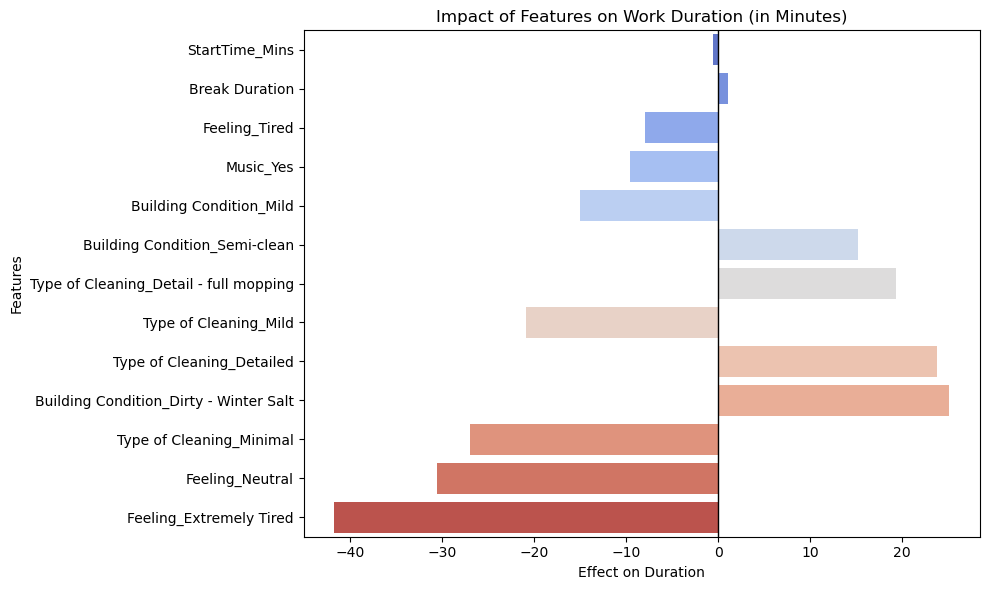

In [230]:
#plot a barchart to show coefficient against work duration

#first sort coefficient by absolute value
coef_sorted = coef.reindex(coef.abs().sort_values(ascending=True).index)

#plot graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x =  coef_sorted.values, y = coef_sorted.index, palette = 'coolwarm')
plt.title('Impact of Features on Work Duration (in Minutes)')
plt.xlabel('Effect on Duration')
plt.ylabel('Features')
plt.axvline(0, color='black', linewidth=1)  # Zero line for visual balance
plt.tight_layout()
plt.show()


In [86]:
#running a  Random forest model to compare its performance with the Regression Model. 
#Note that forest model tells the feature that matters the most, while Regression model gives direction and magnititude
from sklearn.ensemble import RandomForestRegressor
forest_model  = RandomForestRegressor(random_state = 42)
forest_model.fit(x, y)
#display feature importance
importance = pd.Series(forest_model.feature_importances_, index=x.columns)
print(importance.sort_values(ascending = False))

Break Duration                            0.299740
StartTime_Mins                            0.260849
Building Condition_Mild                   0.170381
Type of Cleaning_Minimal                  0.090539
Feeling_Tired                             0.064517
Feeling_Neutral                           0.056207
Music_Yes                                 0.026339
Type of Cleaning_Detailed                 0.012691
Type of Cleaning_Mild                     0.010072
Building Condition_Semi-clean             0.006490
Feeling_Extremely Tired                   0.001102
Building Condition_Dirty - Winter Salt    0.000954
Type of Cleaning_Detail - full mopping    0.000118
dtype: float64


C:\Users\Maureen Michael\AppData\Local\Temp\ipykernel_10040\3589080144.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.sort_values(), y=importance.sort_values().index, palette="viridis")


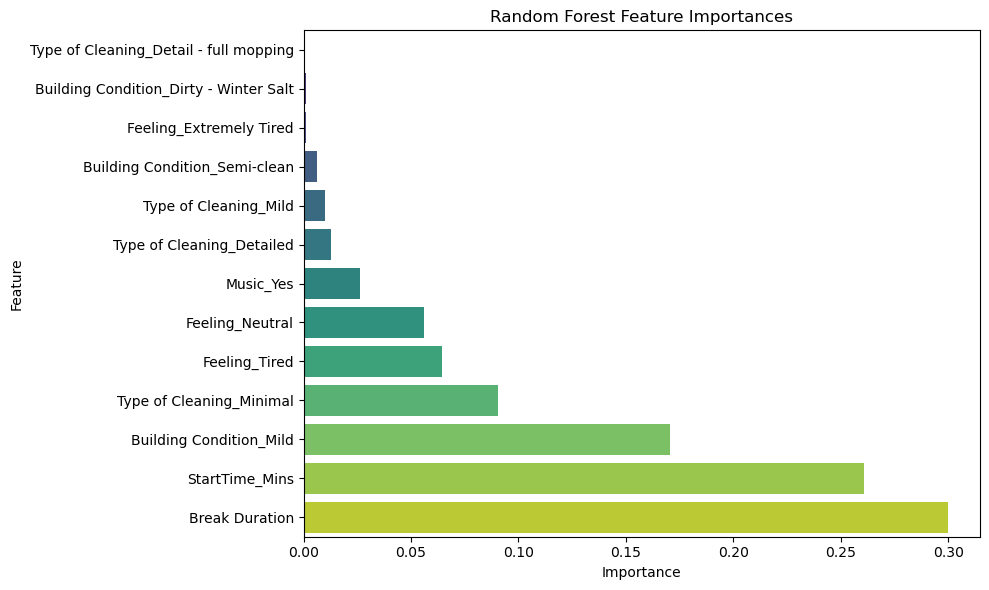

In [88]:
#plot random forest graph
plt.figure(figsize=(10, 6))
sns.barplot(x=importance.sort_values(), y=importance.sort_values().index, palette="viridis")
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [90]:
#test models performancs using R-square

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#make predictions 
predict_linearReg = model.predict(x)
predict_forest = forest_model.predict(x)

#compare scores for the two models
#R-square score
print("Linear Regression R-sq:", r2_score(y, predict_linearReg))
print("Random Forest R-sq:", r2_score(y, predict_forest))

#mean_absolute_error scores
print("Linear Regression MAE:", mean_absolute_error(y, predict_linearReg))
print("Random Forest MAE:", mean_absolute_error(y, predict_forest))

#mean squared error scores
print("Linear Regression MSE:", mean_squared_error(y, predict_linearReg))
print("Random Forest MSE:", mean_squared_error(y, predict_forest))

Linear Regression R-sq: 0.6859383574325161
Random Forest R-sq: 0.9192660881905339
Linear Regression MAE: 14.820111283366954
Random Forest MAE: 8.375555555555557
Linear Regression MSE: 405.7317771330688
Random Forest MSE: 104.29899444444447


In [251]:
#the r2_score, mean_absolute_error, and mean_squared_error  from Random Square model proved that music has week impact.
#lets explore with p-value to  either accept or reject the hypothesis that music has  positive impact on work completion  time

#first import OLS Regression from statsmodel
import statsmodels.api as sm
import numpy as np

#encode categorical data and identify target
x = pd.get_dummies(dataset[features], drop_first = True)

#add intercept, which is  constant x
x = sm.add_constant(x)

#convert all x values to float
x = x.astype(float)

y  = pd.to_numeric(dataset['Duration_Mins'], errors = 'coerce')

#mask x and y
mask  = ~y.isna()
x, y = x[mask], y[mask]

#fit modle
ols_model = sm.OLS(y, x).fit()

#print result
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Duration_Mins   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3.696
Date:                Sun, 25 May 2025   Prob (F-statistic):            0.00343
Time:                        20:50:28   Log-Likelihood:                -159.18
No. Observations:                  36   AIC:                             346.4
Df Residuals:                      22   BIC:                             368.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [92]:
#forecast what the next month will be like with and without music

import pandas as pd

features = ['Music', 'Feeling', 'Break Duration',
            'StartTime_Mins', 'Building Condition', 'Type of Cleaning']
X_forest = pd.get_dummies(dataset[features], drop_first=True)
#create base data
base_data = {
    'Break Duration': [50, 50],
    'StartTime_Mins': [1350, 1350],
    'Music_Yes': [1, 0],  
    'Feeling_Neutral': [1, 1],
    'Feeling_Tired': [0, 0],
    'Feeling_Extremely Tired': [0, 0],
    'Building Condition_Mild': [1, 1],
    'Building Condition_Semi-clean': [0, 0],
    'Building Condition_Dirty - Winter Salt': [0, 0],
    'Type of Cleaning_Detailed': [1, 1],
    'Type of Cleaning_Mild': [0, 0],
    'Type of Cleaning_Minimal': [0, 0],
    'Type of Cleaning_Detail - full mopping': [0, 0],
}

forecast_df = pd.DataFrame(base_data)

#reorder columns  to match the trained data

#forecast_df = forecast_df[X.columns]
forecast_df = forecast_df.reindex(columns=X_forest.columns, fill_value=0)

#predict
predictions = forest_model.predict(forecast_df)

#assign labels for readability
forecast_df['Scenario'] = ['With Music', 'Without Music']
forecast_df['Predicted Duration (mins)'] = predictions

#display result
forecast_df[['Scenario', 'Predicted Duration (mins)']]


,Scenario,Predicted Duration (mins)
0,With Music,348.70
1,Without Music,349.88


In [96]:
dataset.to_csv('Cleaned_dataset', index = False)

In [128]:

#Find earliest and latest completion days
earliest_completion = dataset['Duration_Mins'].min()
latest_completion = dataset['Duration_Mins'].max()

#Get rows for those durations
earliest_row = dataset[dataset['Duration_Mins'] == earliest_completion].iloc[0]
latest_row = dataset[dataset['Duration_Mins'] == latest_completion].iloc[0]

#Prepare values
category = ['Earliest Completion', 'Latest Completion']
result = [earliest_completion, latest_completion]
workday = [earliest_row['Day'], latest_row['Day']]
workdate = [earliest_row['Date'], latest_row['Date']]

# Build the result DataFrame
completion_diff = pd.DataFrame({
    'Category': category,
    'Duration (mins)': result,
    'Day': workday,
    'Date': workdate
})

completion_diff.head()


,Category,Duration (mins),Day,Date
0,Earliest Completion,285.0,Monday,2024-12-16
1,Latest Completion,414.0,Tuesday,2024-11-12
